##1) read the data from employee.txt
##2) Create a ruleset that contains the rules to check following condtions :
 ###  a) price and number of copies should be positive
 ### b) if copies >=1 then the status should be positive
 ###  c) Department can only be Computer , Maths, Statistics 
 ###  d) Price can be maximum Rs 1000
## 3) Check whether the ruleset is violated by data in file 'employee.txt'
## 4) Summarize the result in 3
## 5) Visualize the result for violation of each rule suing pie chart

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# i) Read the data from 'employee.txt'
data = pd.read_csv('employee.txt', delimiter=' ')
data.head()

,Name,Department,Price,Copies,Status
0,Discrete-Structures,Computer,500,2,Availabe
1,Fuzzy-Maths,Maths,-20,0,Availabe
2,Hypothesis-Testing,Statistics,100,2,Unavailable
3,Data-Mining,Comp.,100000,-3,Unavailable


In [4]:
# ii) Create a ruleset
ruleset = {
    'Price and number of copies should be positive': (data['Price'] > 0) & (data['Copies'] > 0),
    'If copies >= 1, then the status should be positive': (~data['Copies'].ge(1)) | (data['Status'] == 'Available'),
    'Department can only be Computer, Maths, Statistics': data['Department'].isin(['Computer', 'Maths', 'Statistics']),
    'Price can be maximum Rs 1000': data['Price'] <= 1000
}

In [5]:
# iii) Check if rules are violated
violations = {rule: (~condition).sum() for rule, condition in ruleset.items()}

In [6]:
# iv) Summarize the result
total_violations = sum(violations.values())
result_summary = f'Total violations: {total_violations}\n'
for rule, violation_count in violations.items():
    result_summary += f'{rule}: {violation_count}\n'

In [7]:
print(result_summary)

Total violations: 6
Price and number of copies should be positive: 2
If copies >= 1, then the status should be positive: 2
Department can only be Computer, Maths, Statistics: 1
Price can be maximum Rs 1000: 1



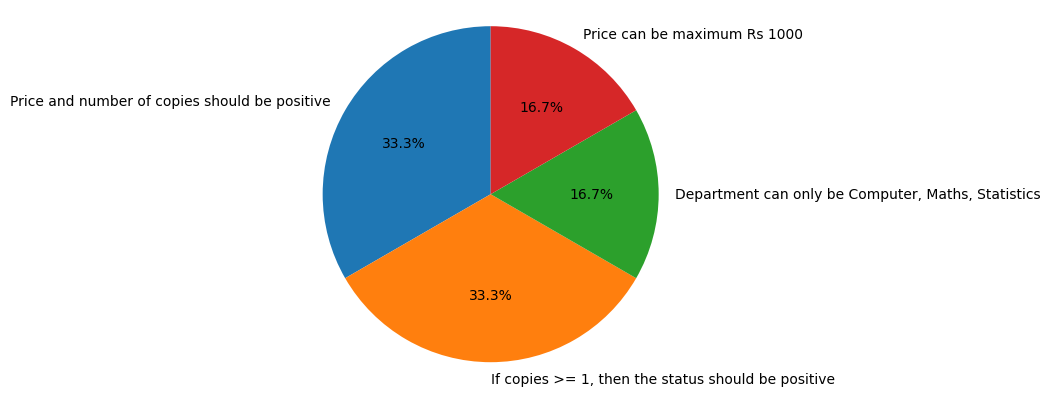

In [8]:
# v) visualise the result
labels = violations.keys()
sizes = violations.values()
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()